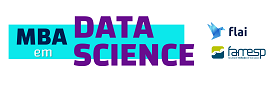

# **Covid-19 no Brasil - Panorama dos 2 primeiros anos da Pandemia**

## **Entendendo o contexto**

### **Panorama dos 2 primeiros anos de Covid-19 no Brasil**

Em  25 de Fevereiro de 2020 foi registrado o primeiro caso de Covid-19 no Brasil, no Estado de São Paulo. Em 05 de Março deste mesmo ano foi confirmado um caso no Rio de Janeiro, e no dia seguinte - 06 de março - foi confirmados casos na Bahia e Espirito Santo. Em 11 de Março de 2020 a Organização Mundial de Saúde decretou Pandemia de Covid-19 e em 17 de março foi registrado o primeiro óbito no Brasil no estado de São Paulo. Somente quase 1 ano depois do primeiro caso registrado foi que iniciou a vacinação no Brasil. Em 2 anos de pandemia, o Brasil passou por 3 ondas de casos devido ao Covid-19, e continou registrando casos e mortes por complicações desse vírus.

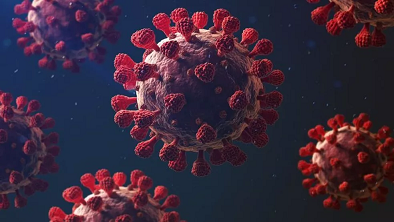

### **O Objetivo da Aula**

Entender o panorama da Covid-19 nos 2 primeiros anos da Pandemia no Brasil através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos das estatísticas das copas do mundo de futebol masculino, foi estruturado de forma que cada instância corresponde a um dia do ano, e os atributos são:

- **epi_week:**         
- **date:**
- **country:**       
- **state:**         
- **city:**          
- **newDeaths:**                                     
- **deaths:**           
- **newCases:**         
- **totalCases:**                                    
- **deathsMS:**         
- **totalCasesMS:**                                  
- **deaths_per_100k_inhabitants:**                   
- **totalCases_per_100k_inhabitants:**               
- **deaths_by_totalCases:**                          
- **recovered:**                                     
- **suspects:**                                      
- **tests:**                                         
- **tests_per_100k_inhabitants:**                    
- **vaccinated:**                                   
- **vaccinated_per_100_inhabitants:**               
- **vaccinated_second:**                             
- **vaccinated_second_per_100_inhabitants:**        
- **vaccinated_single:**                             
- **vaccinated_single_per_100_inhabitants :**     
- **vaccinated_third:**                              
- **vaccinated_third_per_100_inhabitants:**          
- **population:**                                    
- **Pais:**                                           
- **Nome_Regiao:**                                    
- **Codigo_Regiao :**                                
- **Nome_UF:**                                        
- **Codigo_UF:**                                     
- **Sigla_UF:**                                 

O conjunto de dado está disponível em um repositório no GitHub que pode ser acessado através dos links:

- https://raw.githubusercontent.com/jonates/opendata/master/covid19_brasil/cases-brazil-states.csv'


### **A Biblioteca Bokeh**

Bokeh é uma biblioteca python, muito poderosa, para visualização de dados. Para maiores informações da Bokeh, consulte a documentação no endereço a seguir:
- https://bokeh.org/

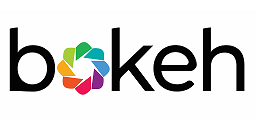

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [83]:
# Importando o Pandas
import pandas as pd

In [84]:
# Importando o conjunto de dados
covid = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/covid19_brasil/cases-brazil-states.csv', 
    sep=',',
    decimal='.'
)

### **Entendendo a estrutura o conjunto de dados**

In [85]:
# Espiando o conjunto de dados
covid.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Espiando a estrutura do conjunto de dados
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20986 entries, 0 to 20985
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   epi_week                               20986 non-null  int64  
 1   date                                   20986 non-null  object 
 2   country                                20986 non-null  object 
 3   state                                  20986 non-null  object 
 4   city                                   20986 non-null  object 
 5   newDeaths                              20986 non-null  int64  
 6   deaths                                 20986 non-null  int64  
 7   newCases                               20986 non-null  int64  
 8   totalCases                             20986 non-null  int64  
 9   deathsMS                               20986 non-null  int64  
 10  totalCasesMS                           20986 non-null  int64  
 11  de

### **Transformando o conjunto de dados**

In [87]:
# Transformando o atributo 'data' em datetime
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)

In [88]:
# Calculando a população baseado
covid['population'] = covid['totalCases'] \
                  .div(covid['totalCases_per_100k_inhabitants'])\
                  .mul(100000)

In [89]:
# Carregando arquivo com geoinformação
geoinformacao = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/codigos_IBGE_UF_Regioes/codigos_IBGE_UF_Regioes.csv', 
    sep=';',
    encoding = 'latin-1'
)

# espiando
geoinformacao.head(2)

,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF
0,Brasil,Norte,1,Rondônia,11,RO
1,Brasil,Norte,1,Acre,12,AC


In [90]:
# Trazendo geoinformações para o dataset de covid-19
covid = pd.merge(
    left = covid,
    right = geoinformacao,
    how = 'left',
    left_on = 'state',
    right_on = 'Sigla_UF'
)

# Verificando a nova estrutura do dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 20985
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               20986 non-null  int64         
 1   date                                   20986 non-null  datetime64[ns]
 2   country                                20986 non-null  object        
 3   state                                  20986 non-null  object        
 4   city                                   20986 non-null  object        
 5   newDeaths                              20986 non-null  int64         
 6   deaths                                 20986 non-null  int64         
 7   newCases                               20986 non-null  int64         
 8   totalCases                             20986 non-null  int64         
 9   deathsMS                               20986 non-null  int64 

In [ ]:
# Verificando a nova estrutura do dataset
covid.info()

### **Análise dos indicadores sobre a Pandemia do Covid-19 após 2 anos no Brasil**

#### **Preparando o ambiente para rodar gráficos em Bokeh**

In [92]:
# Importando de forma explícitas as bibliotecas
import bokeh.io
import bokeh.plotting

# Habilitando a visualização de gráficos gerados pelo Bokeh em Notebooks
bokeh.io.output_notebook()

#### **Situação da Vacinação em 31/03/2022**

In [93]:
# Filtrando somente resultados total do Brasil em 31 de março de 2022
covid_br_202203 = covid.query('(date=="2022-03-31") & (state=="TOTAL") ')

# Espiando filtragem
covid_br_202203

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,population,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF
20985,213,2022-03-31,Brazil,TOTAL,TOTAL,253,660022,31066,29951670,659757,...,2.40682,78545054.0,36.8207,2.133176e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
import numpy as np
# Vacinados com ao menos uma dose
vacinados = np.sum(
    covid_br_202203['vaccinated_per_100_inhabitants']+
    covid_br_202203['vaccinated_single_per_100_inhabitants']
    ).round(2)

# Verificando resultados
vacinados

84.96

In [95]:
#Criando o dataframe
situacao_vacina = pd.DataFrame(
    data={'situacao':['Vacinados','Não Vacinados'], 
        'porcentagem':[vacinados,100-vacinados]})

# Verificando resultados
situacao_vacina

,situacao,porcentagem
0,Vacinados,84.96
1,Não Vacinados,15.04


In [96]:
# Importando Bibliotecas necessárias
from math import pi

# Calculando os angulos
situacao_vacina['angulo'] = situacao_vacina['porcentagem']\
                            .div(situacao_vacina['porcentagem'].sum())\
                            .mul(2*pi)


# Definindo as cores
situacao_vacina['cor'] = ['green', 'tomato']

# Verificando resultados
situacao_vacina                            


,situacao,porcentagem,angulo,cor
0,Vacinados,84.96,5.338194,green
1,Não Vacinados,15.04,0.944991,tomato


In [97]:
# Importando Bibliotecas necessárias
from bokeh.transform import cumsum

In [98]:
# Definindo configurações principais do gráficos
grafico_situacao_vacina = bokeh.plotting.figure(
    title="Situação da População em relação à vacina contra Covid-19, Brasil, 31/Mar/2022.",
    width=400,
    height=400,
    toolbar_location=None,
    tools="hover", 
    tooltips="@situacao: @porcentagem{0.2f}", 
    x_range=(-0.5, 1.0)
)

grafico_situacao_vacina.wedge(
        x=0, y=1, radius=0.4,
        start_angle=cumsum('angulo', include_zero=True), 
        end_angle=cumsum('angulo'),
        line_color="white", 
        fill_color='cor', 
        legend_field='situacao', 
        source=situacao_vacina
)

# Ajustes necessarios
grafico_situacao_vacina.axis.axis_label = None
grafico_situacao_vacina.axis.visible = False
grafico_situacao_vacina.grid.grid_line_color = None


# Exibindo o gráfico de linhas
bokeh.io.show(grafico_situacao_vacina)

#### **Prevalência x Mortalidade Acumulada por Covid-19 nas Unidades da Federação do BRasil**

In [99]:
# Filtrando somente resultados total do Brasil em 31 de março de 2022
covid_uf_202203 = covid.query('(date=="2022-03-31") & (state!="TOTAL") ')

# Espiando filtragem
covid_uf_202203

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,population,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF
20958,213,2022-03-31,Brazil,AC,TOTAL,0,1992,0,123812,1992,...,1.43514,185192.0,20.99837,8.819350e+05,Brasil,Norte,1.0,Acre,12.0,AC
20959,213,2022-03-31,Brazil,AL,TOTAL,4,6884,43,296188,6884,...,1.74243,860463.0,25.78277,3.337357e+06,Brasil,Nordeste,2.0,Alagoas,27.0,AL
20960,213,2022-03-31,Brazil,AM,TOTAL,0,14155,58,581291,14155,...,1.46779,1031238.0,24.88150,4.144597e+06,Brasil,Norte,1.0,Amazonas,13.0,AM
20961,213,2022-03-31,Brazil,AP,TOTAL,0,2124,4,160341,2124,...,1.30160,103278.0,12.21168,8.457310e+05,Brasil,Norte,1.0,Amapá,16.0,AP
20962,213,2022-03-31,Brazil,BA,TOTAL,13,29713,858,1532682,29713,...,1.79434,4837042.0,32.52216,1.487306e+07,Brasil,Nordeste,2.0,Bahia,29.0,BA
20963,213,2022-03-31,Brazil,CE,TOTAL,0,26731,0,1240117,26731,...,2.14694,3677063.0,40.26535,9.132078e+06,Brasil,Nordeste,2.0,Ceará,23.0,CE
20964,213,2022-03-31,Brazil,DF,TOTAL,2,11584,125,692365,11584,...,2.03508,1106100.0,36.68331,3.015268e+06,Brasil,Centro-Oeste,5.0,Distrito Federal,53.0,DF
20965,213,2022-03-31,Brazil,ES,TOTAL,1,14335,327,1039246,14335,...,3.15825,1490628.0,37.09276,4.018650e+06,Brasil,Sudeste,3.0,Espírito Santo,32.0,ES
20966,213,2022-03-31,Brazil,GO,TOTAL,17,26242,2570,1280214,26242,...,2.26265,1963071.0,27.97053,7.018354e+06,Brasil,Centro-Oeste,5.0,Goiás,52.0,GO
20967,213,2022-03-31,Brazil,MA,TOTAL,1,10872,256,425587,10872,...,1.69645,1422883.0,20.11091,7.075181e+06,Brasil,Nordeste,2.0,Maranhão,21.0,MA


In [100]:
# Importando biblioteca necessária
from bokeh.models import CategoricalColorMapper

In [101]:
# Definindo configurações principais do gráficos
grafico_prevalencia_mortalidade = bokeh.plotting.figure(
    title="Prevalência x Mortalidade Acumulada por Covid-19 nas Unidades da Federação do Brasi, 31/Mar/2022.",
    width=600,
    height=400,
    x_axis_label="Total de Casos de Covid-19 por 100 mil habitantes",
    y_axis_label="Total de Mortes de Covid-19 por 100 mil habitantes",
    #toolbar_location=None,
    tools="hover", 
    tooltips=([
    ("UF", "@state"),
    ("Prevalência", "@totalCases_per_100k_inhabitants{0.0f}"),
    ("Mortalidade", "@deaths_per_100k_inhabitants")
    ]), 
   x_range=(0, 30000), 
   y_range=(0, 500)
)

# Criando paleta de cores
regioes = covid_uf_202203['Nome_Regiao'].unique().tolist()
paleta_cores = CategoricalColorMapper(factors=regioes, palette=['deeppink','orange','blue','lime','dimgrey'])

# Criando as bolhas
grafico_prevalencia_mortalidade.circle(
    x='totalCases_per_100k_inhabitants', 
    y='deaths_per_100k_inhabitants', 
    fill_alpha = 1, 
    source = covid_uf_202203,
    color=dict(field='Nome_Regiao', transform=paleta_cores), 
    size=8, 
    legend_group='Nome_Regiao'
)

# Ajustes adicionais
grafico_prevalencia_mortalidade.outline_line_color = None # Remove quadro contorno
grafico_prevalencia_mortalidade.grid.grid_line_color = None # Remove linhas de grades
#gols_por_partida.axis.axis_line_color = None # Remove linhas de eixo
grafico_prevalencia_mortalidade.legend.location ="bottom_right"
grafico_prevalencia_mortalidade.legend.orientation = "horizontal"


# Exibindo o gráfico de linhas
bokeh.io.show(grafico_prevalencia_mortalidade)

https://docs.bokeh.org/en/latest/docs/reference/palettes.html#bokeh-palettes

#### **Curva de incidência de Covid-19 no Brasil**

In [102]:
# Filtrando somente os resultado para TOTAL do Brasil
covid_br = covid.query('state=="TOTAL"')

In [103]:
# Calculando a incidência de casos
covid_br['newCases_per_100k_inhabitants'] = covid_br['newCases']\
  .div(covid_br['population'])\
  .mul(100000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
covid_br[['date','newCases_per_100k_inhabitants']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 1 to 20985
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           766 non-null    datetime64[ns]
 1   newCases_per_100k_inhabitants  766 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.0 KB


In [105]:
# Definindo configurações principais do gráficos
grafico_incidencia = bokeh.plotting.figure(
    title="Casos por 100 mil habitantes, Brasil, 2020 - 03/2022.",
    width=800,
    height=400,
    x_axis_label="Data",
    y_axis_label="Casos por 100 mil habitantes",
    x_axis_type="datetime"
)

# Elaborando o gráfico de linhas
grafico_incidencia.line(
    source = covid_br,
    x = 'date', 
    y = 'newCases_per_100k_inhabitants',
    legend_label="Casos / 100 mil hab.", 
    line_color="darkblue", 
    line_width=1
)

# Ajustes adicionais
grafico_incidencia.outline_line_color = None # Remove quadro contorno
grafico_incidencia.grid.grid_line_color = None # Remove linhas de grades
grafico_incidencia.legend.visible = False # Retira legenda

# Exibindo o gráfico de linhas
bokeh.io.show(grafico_incidencia)

In [106]:
# Calculando a média móvel de incidência de casos
covid_br['ma_newCases_per_100k_inhabitants'] = covid_br['newCases_per_100k_inhabitants']\
  .rolling(7)\
  .mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
# Importando Biblioteca necessaria
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource

In [108]:
# Definindo configurações principais do gráficos
grafico_mm_incidencia = bokeh.plotting.figure(
    title="Média Móvel dos casos por 100 mil habitantes, Brasil, mar/2020 - mar/2022.",
    width=800,
    height=400,
    x_axis_label="Data",
    y_axis_label="Média Móvel dos casos por 100 mil habitantes",
    x_axis_type="datetime"
)

# Elaborando o gráfico de linhas
grafico_mm_incidencia.line(
    source = covid_br,
    x = 'date', 
    y = 'ma_newCases_per_100k_inhabitants',
    legend_label="Média Móvel Casos / 100 mil hab.", 
    line_color="maroon", 
    line_width=2
)


grafico_mm_incidencia.add_tools(
    HoverTool(
        tooltips = [
           ("Data", "@date{%F}"),
           ("Média Móvel Casos por 100 mil habitantes", 
            "@ma_newCases_per_100k_inhabitants{0.0f}"
           )
        ],
        formatters={'@date': 'datetime'},
        mode='vline'
    )
)

# Ajustes adicionais
grafico_mm_incidencia.outline_line_color = None # Remove quadro contorno
grafico_mm_incidencia.grid.grid_line_color = None # Remove linhas de grades
grafico_mm_incidencia.legend.visible = False # Retira legenda

# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(grafico_mm_incidencia)

- https://docs.bokeh.org/en/latest/docs/user_guide/tools.html
- http://docs.bokeh.org/en/1.0.2/docs/user_guide/examples/tools_hover_tooltip_formatting.html

#### Mapa **Covid-19 no Brasil por UF em 31/03/2022**

##### **Organizando o dataset**

In [109]:
# Filtrando somente resultados total do Brasil em 31 de março de 2022
covid_uf_202203 = covid.query('(date=="2022-03-31") & (state!="TOTAL") ')

# Espiando filtragem
covid_uf_202203

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,population,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF
20958,213,2022-03-31,Brazil,AC,TOTAL,0,1992,0,123812,1992,...,1.43514,185192.0,20.99837,8.819350e+05,Brasil,Norte,1.0,Acre,12.0,AC
20959,213,2022-03-31,Brazil,AL,TOTAL,4,6884,43,296188,6884,...,1.74243,860463.0,25.78277,3.337357e+06,Brasil,Nordeste,2.0,Alagoas,27.0,AL
20960,213,2022-03-31,Brazil,AM,TOTAL,0,14155,58,581291,14155,...,1.46779,1031238.0,24.88150,4.144597e+06,Brasil,Norte,1.0,Amazonas,13.0,AM
20961,213,2022-03-31,Brazil,AP,TOTAL,0,2124,4,160341,2124,...,1.30160,103278.0,12.21168,8.457310e+05,Brasil,Norte,1.0,Amapá,16.0,AP
20962,213,2022-03-31,Brazil,BA,TOTAL,13,29713,858,1532682,29713,...,1.79434,4837042.0,32.52216,1.487306e+07,Brasil,Nordeste,2.0,Bahia,29.0,BA
20963,213,2022-03-31,Brazil,CE,TOTAL,0,26731,0,1240117,26731,...,2.14694,3677063.0,40.26535,9.132078e+06,Brasil,Nordeste,2.0,Ceará,23.0,CE
20964,213,2022-03-31,Brazil,DF,TOTAL,2,11584,125,692365,11584,...,2.03508,1106100.0,36.68331,3.015268e+06,Brasil,Centro-Oeste,5.0,Distrito Federal,53.0,DF
20965,213,2022-03-31,Brazil,ES,TOTAL,1,14335,327,1039246,14335,...,3.15825,1490628.0,37.09276,4.018650e+06,Brasil,Sudeste,3.0,Espírito Santo,32.0,ES
20966,213,2022-03-31,Brazil,GO,TOTAL,17,26242,2570,1280214,26242,...,2.26265,1963071.0,27.97053,7.018354e+06,Brasil,Centro-Oeste,5.0,Goiás,52.0,GO
20967,213,2022-03-31,Brazil,MA,TOTAL,1,10872,256,425587,10872,...,1.69645,1422883.0,20.11091,7.075181e+06,Brasil,Nordeste,2.0,Maranhão,21.0,MA


##### **Carregando e tratando o arquivo com dados geoespaciais das regiões do Brasil**

In [110]:
# Instalando biblioteca
!pip install geopandas

In [111]:
# Importando bibliotecas necessárias
import geopandas as gpd
import json

In [112]:
# Pegando o geojson
url_geojson = 'https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json'
geoespaciais = gpd.read_file(url_geojson)

In [113]:
# Espiando o objeto
geoespaciais.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NM_ESTADO  27 non-null     object  
 1   NM_REGIAO  27 non-null     object  
 2   CD_GEOCUF  27 non-null     object  
 3   geometry   27 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 992.0+ bytes


In [114]:
# Criando uma variável com código da UF com mesmo nome e formato do geojson
covid_uf_202203['CD_GEOCUF'] = covid_uf_202203['Codigo_UF']
covid_uf_202203['CD_GEOCUF'] = covid_uf_202203['CD_GEOCUF'].astype('int').astype('str')
covid_uf_202203.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 20958 to 20984
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               27 non-null     int64         
 1   date                                   27 non-null     datetime64[ns]
 2   country                                27 non-null     object        
 3   state                                  27 non-null     object        
 4   city                                   27 non-null     object        
 5   newDeaths                              27 non-null     int64         
 6   deaths                                 27 non-null     int64         
 7   newCases                               27 non-null     int64         
 8   totalCases                             27 non-null     int64         
 9   deathsMS                               27 non-null     int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
# Levando os dados para dentro do objeto geoespacial
geoespaciais = geoespaciais.merge(
    covid_uf_202203[['CD_GEOCUF', 'Nome_UF', 'Sigla_UF', 'deaths_per_100k_inhabitants',]], on='CD_GEOCUF')

In [116]:
# Espiando o objeto
geoespaciais.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   NM_ESTADO                    27 non-null     object  
 1   NM_REGIAO                    27 non-null     object  
 2   CD_GEOCUF                    27 non-null     object  
 3   geometry                     27 non-null     geometry
 4   Nome_UF                      27 non-null     object  
 5   Sigla_UF                     27 non-null     object  
 6   deaths_per_100k_inhabitants  27 non-null     float64 
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.7+ KB


##### **Elaborando o mapa**

In [117]:
# Importando bibliotecas necessárias
from bokeh.models import GeoJSONDataSource
from bokeh.palettes import YlGnBu
from bokeh.models import LinearColorMapper, ColorBar

In [119]:
geoespaciais['deaths_per_100k_inhabitants'].max()

426.29201

In [120]:
geoespaciais['deaths_per_100k_inhabitants'].min()

153.66391

In [122]:
# Lendo json e fazendo transformações necessárias para GEOJSON
merged_json = json.loads(geoespaciais.to_json())
json_data = json.dumps(merged_json)
geojson_uf = GeoJSONDataSource(geojson = json_data)


# Definindo paleta de cores
palette = bokeh.palettes.YlGnBu[8]
palette = palette[::-1]

# Fazendo cortes linerares na escala para para aplicar paleta
color_mapper = LinearColorMapper(
    palette = palette, 
    low = geoespaciais['deaths_per_100k_inhabitants'].min(), 
    high = geoespaciais['deaths_per_100k_inhabitants'].max(), 
    nan_color = '#d9d9d9')

# Ajustando ferramenta para popup com mouse
hover = HoverTool(
    tooltips = [ ('UF','@Sigla_UF'),
                ('Tx. Mortalidade','@deaths_per_100k_inhabitants')
    ])

# Criando barras de cores 
color_bar = ColorBar(
    color_mapper=color_mapper, 
    label_standoff=8,
    width = 500, 
    height = 20,
    border_line_color=None,
    location = (0,0), 
    orientation = 'horizontal', 
    #major_label_overrides = stick_labels
    )

# Definindo propriedades do mapa
mapa_uf = bokeh.plotting.figure(
    title = 'Taxa de Mortalidade por 100 mil habitantes', 
    plot_height = 600 , 
    plot_width = 500, 
    toolbar_location = None, 
    tools = [hover]
)

# Ajustando linhas de grades e visibilidade dos eixos
mapa_uf.xaxis.visible = False
mapa_uf.yaxis.visible = False
mapa_uf.xgrid.grid_line_color = None
mapa_uf.ygrid.grid_line_color = None

# Ajustes para renderização. 
mapa_uf.patches(
  'xs','ys', source = geojson_uf,
  fill_color = {'field' :'deaths_per_100k_inhabitants', 'transform' : color_mapper},
  line_color = 'black', line_width = 0.25, fill_alpha = 1
)

# Adicionando barra de cores
mapa_uf.add_layout(color_bar, 'below')


# Exibindo o mapa
bokeh.io.show(mapa_uf)

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa gráficos com a biblioteca Bokeh, para visualizar o consumo de energia elétrica no Brasil .

O conjunto de dados está disponível para download no link:
- https://raw.githubusercontent.com/jonates/opendata/master/consumo_energia_eletrica/consumo_energia_eletrica.csv